# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
News=[]
Type=[]

path="/content/drive/MyDrive/AlmaBetter/Module - 3 Machine Learning /Project/Topic Modeling/Topic Modeling on News Articles/Data"
folders=["business","entertainment","politics","sport","tech"] 

for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,encoding="utf8", errors='ignore') as f:
            data=f.read()
        News.append(data)
        Type.append(i)
      

data={'news':News,'type':Type}
df = pd.DataFrame(data)

In [4]:
df.head()

news      type
0  Yukos unit buyer faces loan claim\n\nThe owner...  business
1  Ad sales boost Time Warner profit\n\nQuarterly...  business
2  Dollar gains on Greenspan speech\n\nThe dollar...  business
3  US trade gap hits record in 2004\n\nThe gap be...  business
4  High fuel prices hit BA's profits\n\nBritish A...  business

In [5]:
# Converting column into astring
df['news'] = df['news'].astype('str')

In [6]:
# Removing HTML Tag
import re
def remove_html_tags(text):
	html_pattern = r'<.*?>'
	without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
	return without_html

In [7]:
df['news']=df['news'].apply(remove_html_tags)

In [8]:
# Removing URLs
def remove_urls(text):
	url_pattern = r'https?://\S+|www\.\S+' 
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls

In [9]:
df['news']=df['news'].apply(remove_urls)

In [10]:
# Removing numbers
def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

In [11]:
df['news']=df['news'].apply(remove_numbers)

In [12]:
# Removing single Charecter
def remove_single_char(text):
	single_char_pattern = r'\s+[a-zA-Z]\s+'
	without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
	return without_sc

In [13]:
df['news']=df['news'].apply(remove_single_char)

In [14]:
df.head()

news      type
0  Yukos unit buyer faces loan claim\n\nThe owner...  business
1  Ad sales boost Time Warner profit\n\nQuarterly...  business
2  Dollar gains on Greenspan speech\n\nThe dollar...  business
3  US trade gap hits record in  \n\nThe gap betwe...  business
4  High fuel prices hit BA's profits\n\nBritish A...  business

In [15]:
# Download stopwords from nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))

In [17]:
import string

In [18]:
# Removing StopWord
def Change_text(msg):
  punc=[char for char in msg if str(char) not in string.punctuation]
  no_punc=''.join(punc)
  main_text=[word for word in no_punc.split() if word.lower() not in stop_words]
  return ' '.join(main_text)

In [19]:
# Apply Lemmatization
def lemmatization(texts):
  sentence=''
  allowed_postags=['NOUN','ADJ','VERB','ADV']
  texts_out=[]
  doc=nlp(texts)
  texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  return ' '.join(texts_out[0])

In [20]:
df['news']=df['news'].apply(Change_text)

In [21]:
import spacy

nlp=spacy.load('en',disable=['parser', 'ner'])
df['news']=df['news'].apply(lemmatization)

In [22]:
df.head()

news      type
0  unit buyer face loan claim owner embattle russ...  business
1  ad sale boost profit profit medium giant jump ...  business
2  dollar gain speech dollar hit high level almos...  business
3  trade gap hit record gap export import hit lat...  business
4  high fuel price hit ba profit blame high fuel ...  business

In [23]:
# Remove duplicate values
df.drop_duplicates(inplace=True)

In [24]:
df.head()

news      type
0  unit buyer face loan claim owner embattle russ...  business
1  ad sale boost profit profit medium giant jump ...  business
2  dollar gain speech dollar hit high level almos...  business
3  trade gap hit record gap export import hit lat...  business
4  high fuel price hit ba profit blame high fuel ...  business

In [25]:
df.shape

(2113, 2)

##Exploratory Aata Analysis(EDA)

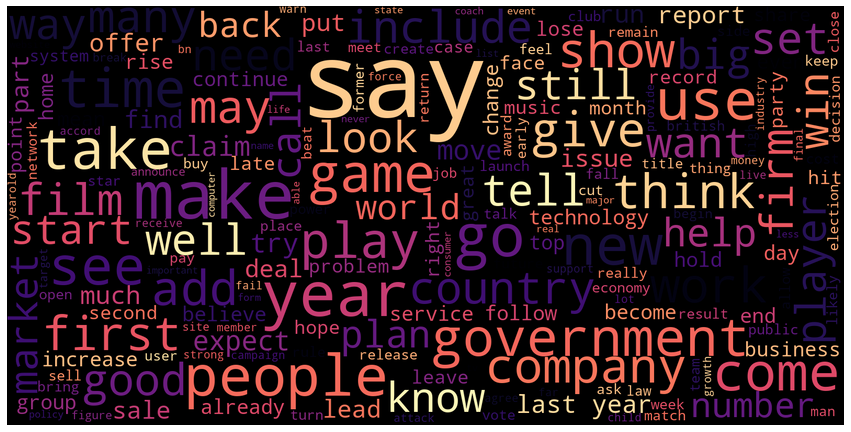

In [26]:
# Create word cloud for all dataset
from wordcloud import WordCloud
text = " ".join(review for review in df.news)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [27]:
df['type'].value_counts()

business         503
sport            500
politics         402
entertainment    368
tech             340
Name: type, dtype: int64

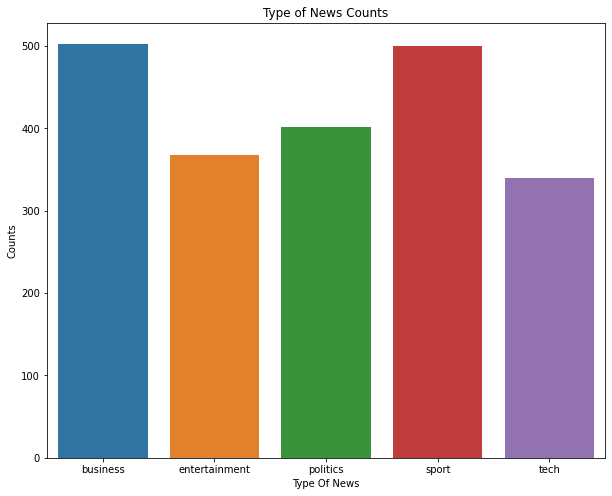

In [28]:
# Countplot for types of news 
import warnings 
plt.figure(figsize=(10,8))
warnings.filterwarnings("ignore")
sns.countplot(df['type'], data=df)
plt.xlabel("Type Of News")
plt.ylabel("Counts")
plt.title("Type of News Counts")
plt.show()

In [29]:
# Create new column length of sentence
df['length']=df['news'].apply(len)
df.head()

news      type  length
0  unit buyer face loan claim owner embattle russ...  business     787
1  ad sale boost profit profit medium giant jump ...  business    1324
2  dollar gain speech dollar hit high level almos...  business    1221
3  trade gap hit record gap export import hit lat...  business    1087
4  high fuel price hit ba profit blame high fuel ...  business    1297

In [30]:
# Create new column word count of sentence
df['word_count'] = df['news'].apply(lambda x: len(str(x).split(" ")))
df.head()

news  ... word_count
0  unit buyer face loan claim owner embattle russ...  ...        119
1  ad sale boost profit profit medium giant jump ...  ...        188
2  dollar gain speech dollar hit high level almos...  ...        179
3  trade gap hit record gap export import hit lat...  ...        162
4  high fuel price hit ba profit blame high fuel ...  ...        191

[5 rows x 4 columns]

In [31]:
#Basic information about dataset like null values , datatype , number of rows & column etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news        2113 non-null   object
 1   type        2113 non-null   object
 2   length      2113 non-null   int64 
 3   word_count  2113 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 147.1+ KB


In [32]:
#Describe the dataset with mean , max , count , unique and many more infomation
df.describe()

length   word_count
count   2113.000000  2113.000000
mean    1089.863701   159.799337
std      716.695310   104.097244
min      134.000000    22.000000
25%      652.000000    97.000000
50%      937.000000   138.000000
75%     1363.000000   199.000000
max    12631.000000  1765.000000

In [33]:
bbc_business = df[df['type'] == 'business']
bbc_entertainment = df[df['type'] == 'entertainment']
bbc_politics = df[df['type'] == 'politics']
bbc_sport = df[df['type'] == 'sport']
bbc_tech = df[df['type'] == 'tech']

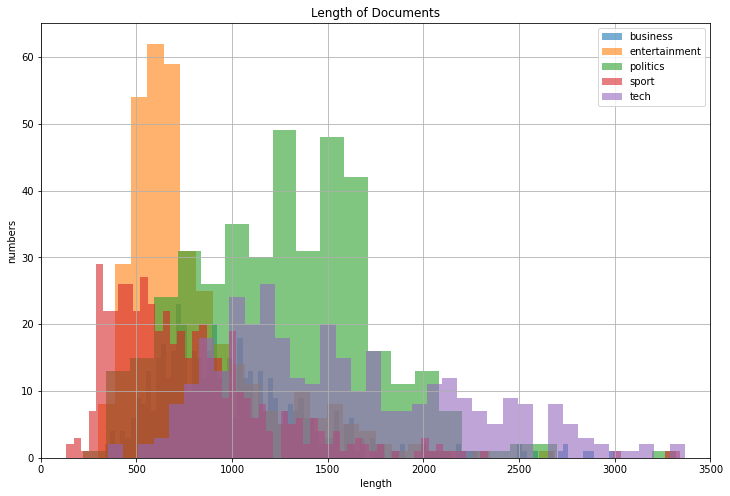

In [34]:
plt.rcParams['figure.figsize'] = (12, 8)
bins = 100
plt.hist(bbc_business['length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc_entertainment['length'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc_politics['length'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc_sport['length'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc_tech['length'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.title("Length of Documents")
plt.legend(loc='upper right')
plt.xlim(0,3500)
plt.grid()
plt.show()

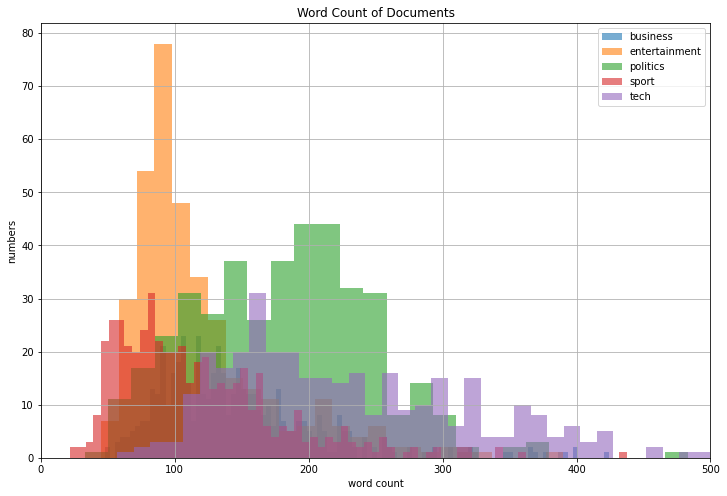

In [35]:
plt.rcParams['figure.figsize'] = (12, 8)
bins = 100
plt.hist(bbc_business['word_count'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc_entertainment['word_count'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc_politics['word_count'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc_sport['word_count'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc_tech['word_count'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('word count')
plt.ylabel('numbers')
plt.title("Word Count of Documents")
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

In [36]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

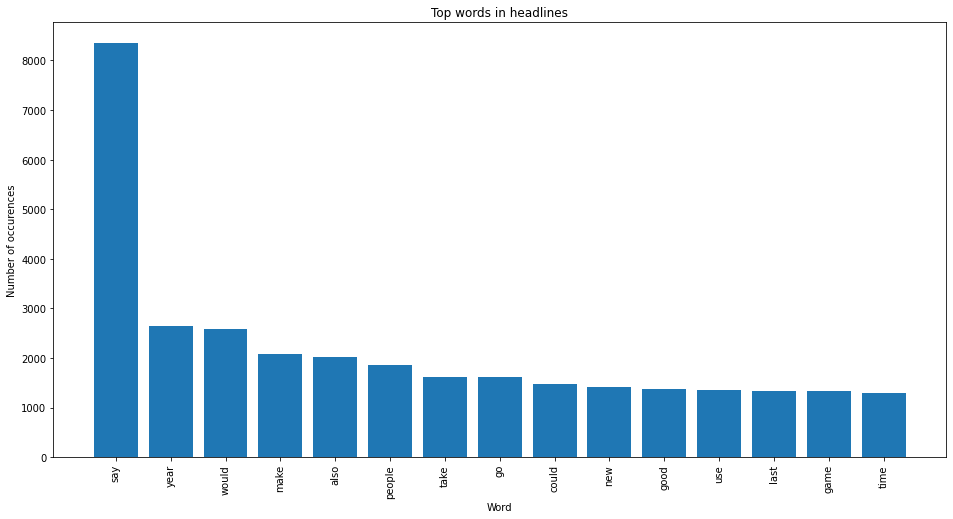

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

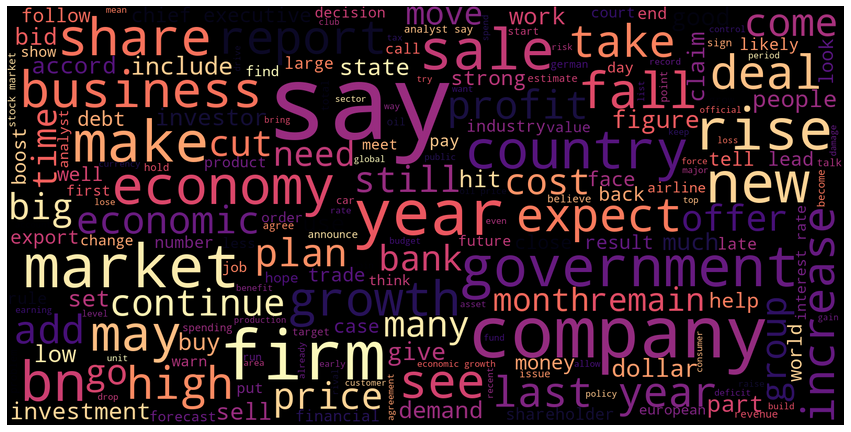

In [38]:
# Word cloud for business type of news
text = " ".join(review for review in df[df['type']=='business']['news'])
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

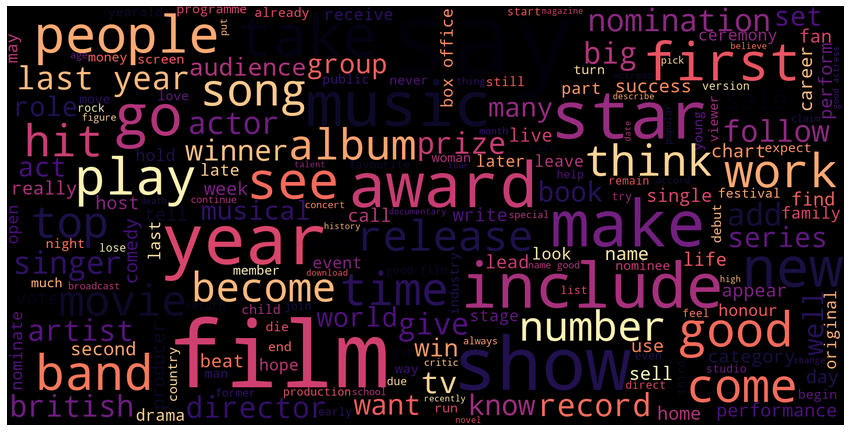

In [39]:
# Word cloud for entertainment type of news
text = " ".join(review for review in df[df['type']=='entertainment']['news'])
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

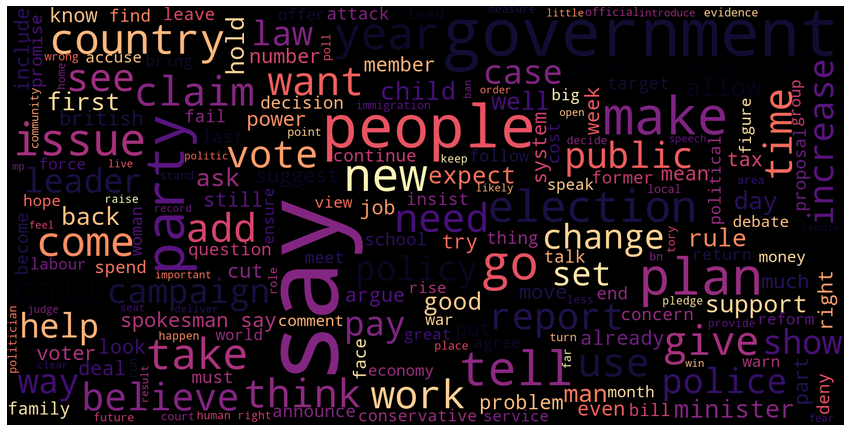

In [40]:
# Word cloud for politics type of news
text = " ".join(review for review in df[df['type']=='politics']['news'])
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

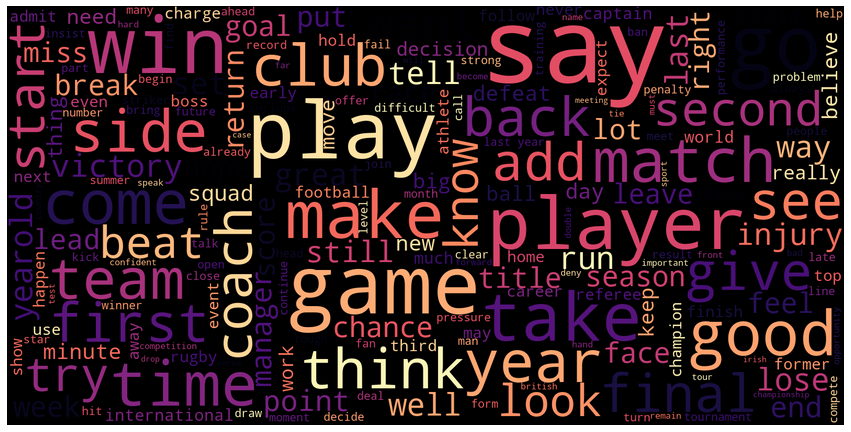

In [41]:
# Word cloud for sport type of news
text = " ".join(review for review in df[df['type']=='sport']['news'])
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

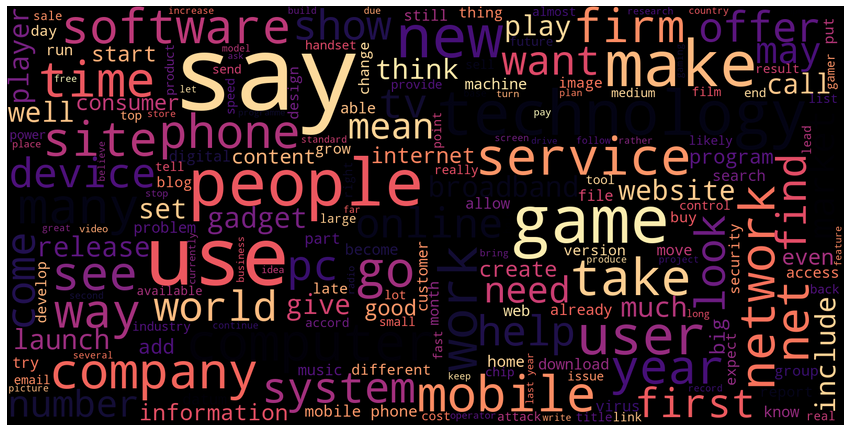

In [42]:
# Word cloud for tech type of news
text = " ".join(review for review in df[df['type']=='tech']['news'])
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=8000,min_df=0.05)

In [44]:
matrix=vectorizer.fit_transform(df['news'])

In [45]:
df1 = pd.DataFrame(matrix.todense() , columns=vectorizer.get_feature_names())

In [46]:
df1.head()

able  accept  access  accord   account  ...  wrong      year  yearold  yet  young
0   0.0     0.0     0.0     0.0  0.000000  ...    0.0  0.000000      0.0  0.0    0.0
1   0.0     0.0     0.0     0.0  0.127262  ...    0.0  0.000000      0.0  0.0    0.0
2   0.0     0.0     0.0     0.0  0.274426  ...    0.0  0.037558      0.0  0.0    0.0
3   0.0     0.0     0.0     0.0  0.000000  ...    0.0  0.110885      0.0  0.0    0.0
4   0.0     0.0     0.0     0.0  0.000000  ...    0.0  0.141666      0.0  0.0    0.0

[5 rows x 500 columns]

##Latent Dirichilet Allocation Using Gensim

In [47]:
word_data=df['news'].str.split().tolist()

In [48]:
import gensim.corpora as corpora
id2word=corpora.Dictionary(word_data)
corpus=[id2word.doc2bow(text) for text in word_data]

In [49]:
print(corpus[:120])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 2), (16, 1), (17, 4), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 4), (77, 4), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 3), (90, 1), (91, 1), (92, 1)], [(3, 1), (13, 1), (20, 2), (31, 1), (40, 1), (43, 1), (47, 1), (60, 1), (62, 1), (69, 1), (76, 5), (77, 5), (81, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 2), (98, 2),

In [50]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 1),
  ('agency', 1),
  ('ahead', 1),
  ('already', 1),
  ('ambition', 1),
  ('arbitration', 1),
  ('arm', 1),
  ('ask', 2),
  ('asset', 3),
  ('attempt', 1),
  ('avoid', 1),
  ('bank', 1),
  ('bankruptcy', 1),
  ('bn', 2),
  ('buy', 2),
  ('buyer', 2),
  ('case', 1),
  ('claim', 4),
  ('clause', 1),
  ('comment', 1),
  ('company', 2),
  ('connect', 1),
  ('court', 1),
  ('credit', 1),
  ('creditor', 1),
  ('debt', 1),
  ('default', 1),
  ('demand', 1),
  ('director', 1),
  ('downfall', 1),
  ('embattle', 1),
  ('exist', 1),
  ('expert', 1),
  ('face', 2),
  ('fight', 1),
  ('file', 1),
  ('force', 2),
  ('foreign', 1),
  ('former', 1),
  ('founder', 1),
  ('giant', 1),
  ('go', 1),
  ('include', 1),
  ('intend', 1),
  ('international', 1),
  ('law', 1),
  ('lawyer', 1),
  ('legal', 1),
  ('littleknown', 1),
  ('loan', 3),
  ('main', 1),
  ('manage', 1),
  ('money', 1),
  ('moscowbase', 1),
  ('news', 1),
  ('obligation', 1),
  ('official', 1),
  ('oil', 1),
  ('owe', 1),
 

In [51]:
import gensim
lda_model= gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=5,update_every=1)

In [52]:
pip install pyLDAvis

In [53]:
import pyLDAvis.sklearn
#import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis=gensimvis.prepare(lda_model,corpus,id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.057549 -0.001481       1        1  25.975611
1      0.042981  0.028441       2        1  22.453963
4      0.044857 -0.025780       3        1  20.217779
0     -0.011916 -0.026775       4        1  18.327023
3     -0.018373  0.025594       5        1  13.025625, topic_info=            Term         Freq        Total Category  logprob  loglift
761         game  2766.000000  2766.000000  Default  30.0000  30.0000
488       mobile  1726.000000  1726.000000  Default  29.0000  29.0000
1395       phone  1507.000000  1507.000000  Default  28.0000  28.0000
499   technology  1847.000000  1847.000000  Default  27.0000  27.0000
3257          tv  1126.000000  1126.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
845         work   154.369051  1248.397744   Topic5  -5.6522  -0.0520
98          also   163.981385  1659.645886   Topic5  -5.5918  -0.2764
41            go   152.590851  1482.665573   Topic5  -5.6638  -0.2356
135         firm   149.959911  1473.643994   Topic5  -5.6812  -0.2469
197      service   147.584619  1504.137617   Topic5  -5.6971  -0.2833

[440 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
10860      4  0.809935  achievable
13694      1  0.839053       addon
13694      2  0.031076       addon
13694      4  0.062152       addon
13694      5  0.062152       addon
...      ...       ...         ...
319        1  0.262463        year
319        2  0.244229        year
319        3  0.130955        year
319        4  0.202235        year
319        5  0.160241        year

[1088 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
model=LatentDirichletAllocation(n_components=5)
lda_topic_matrix=model.fit_transform(matrix)

In [55]:
bivectorizer = CountVectorizer(min_df=10, max_df=0.9, ngram_range=(2,2))
bigram_vectorized = bivectorizer.fit_transform(df['news'])
df2= pd.DataFrame(bigram_vectorized.todense() , columns=bivectorizer.get_feature_names())

In [56]:
df2.head()

accord analyst  accord figure  ...  young people  young player
0               0              0  ...             0             0
1               0              0  ...             0             0
2               0              0  ...             0             0
3               0              0  ...             0             0
4               0              0  ...             0             0

[5 rows x 1300 columns]

In [57]:
bi_lda = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online',verbose=True)
data_bi_lda = bi_lda.fit_transform(bigram_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [58]:
bigram = pd.DataFrame(bi_lda.transform(bigram_vectorized))
bigram.to_csv('bigram.csv', index=False)
doc=pd.read_csv("bigram.csv")

In [59]:
doc.columns=['topic1','topic2','topic3','topic4','topic5']

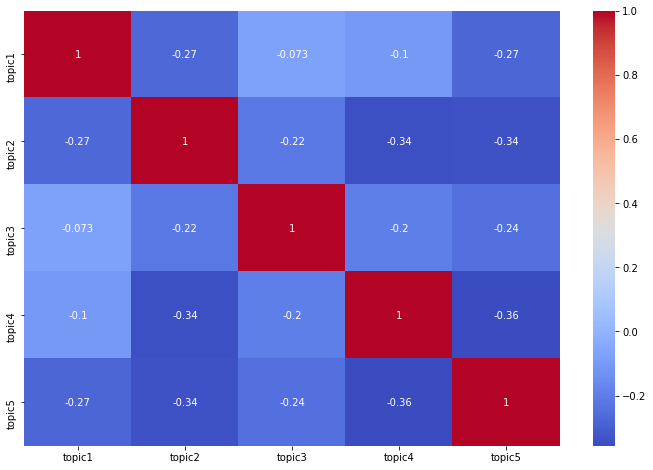

In [60]:
sns.heatmap(data=doc.corr(),annot=True,cmap='coolwarm')

In [61]:
bi_dash = pyLDAvis.sklearn.prepare(bi_lda, bigram_vectorized, bivectorizer, mds='tsne')
bi_dash

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  33.373640
3       51.163364 -159.968018       2        1  23.360224
1      -73.144554   21.523815       3        1  17.388965
0      -66.410133 -110.606438       4        1  13.215205
2       54.417324   12.443444       5        1  12.661965, topic_info=                Term        Freq       Total Category  logprob  loglift
606     mobile phone  202.000000  202.000000  Default  30.0000  30.0000
469    interest rate   92.000000   92.000000  Default  29.0000  29.0000
321       first time  133.000000  133.000000  Default  28.0000  28.0000
497        last year  469.000000  469.000000  Default  27.0000  27.0000
490       last month  132.000000  132.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
1287        year say   29.557479   88.302614   Topic5  -4.7794   0.9721
770   prime minister   25.571426   59.454010   Topic5  -4.9242   1.2228
180       could also   22.718095   42.989378   Topic5  -5.0426   1.4288
495        last week   25.845698  170.153959   Topic5  -4.9136   0.1820
946       say report   19.473021   51.691893   Topic5  -5.1967   1.0903

[281 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
10        1  0.959637  affair spokesman
38        3  0.985699         also play
41        1  0.295994          also say
41        2  0.459300          also say
41        4  0.244960          also say
...     ...       ...               ...
1287      4  0.045299          year say
1287      5  0.339741          year say
1297      4  0.931877         year year
1298      1  0.905495      young people
1298      2  0.080488      young people

[378 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

In [62]:
from gensim.models import Word2Vec
word2vec = Word2Vec(word_data, min_count=2)

In [63]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'unit': <gensim.models.keyedvectors.Vocab object at 0x7f02cf316d10>, 'buyer': <gensim.models.keyedvectors.Vocab object at 0x7f02ce946750>, 'face': <gensim.models.keyedvectors.Vocab object at 0x7f02ce946c90>, 'loan': <gensim.models.keyedvectors.Vocab object at 0x7f02cf16f850>, 'claim': <gensim.models.keyedvectors.Vocab object at 0x7f02ceb87e90>, 'owner': <gensim.models.keyedvectors.Vocab object at 0x7f02cf140850>, 'embattle': <gensim.models.keyedvectors.Vocab object at 0x7f02cee65950>, 'russian': <gensim.models.keyedvectors.Vocab object at 0x7f02cee657d0>, 'oil': <gensim.models.keyedvectors.Vocab object at 0x7f02cf1473d0>, 'giant': <gensim.models.keyedvectors.Vocab object at 0x7f02ceb87ad0>, 'ask': <gensim.models.keyedvectors.Vocab object at 0x7f02cee651d0>, 'former': <gensim.models.keyedvectors.Vocab object at 0x7f02cee65750>, 'production': <gensim.models.keyedvectors.Vocab object at 0x7f02cee65650>, 'pay': <gensim.models.keyedvectors.Vocab object at 0x7f02ce7bbd10>, 'buy': <gensim.mo

In [64]:
similar_words = word2vec.wv.most_similar('stock')
for x in similar_words:
  print(x)

('gross', 0.9989168643951416)
('soar', 0.9988974332809448)
('copy', 0.9988409280776978)
('late', 0.9986249804496765)
('monthly', 0.9985681176185608)
('lending', 0.9985244870185852)
('production', 0.9984359741210938)
('decline', 0.9982951879501343)
('worldwide', 0.9982911348342896)
('flat', 0.9982600212097168)


/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


In [65]:
word=pd.DataFrame(similar_words)
word.head()

0         1
0    gross  0.998917
1     soar  0.998897
2     copy  0.998841
3     late  0.998625
4  monthly  0.998568

In [66]:
similar_words = word2vec.wv.most_similar('film')
for x in similar_words:
  print(x)

('good', 0.9716932773590088)
('award', 0.9712092876434326)
('star', 0.9344039559364319)
('play', 0.9243816137313843)
('actor', 0.9226816892623901)
('game', 0.9128936529159546)
('name', 0.9079622030258179)
('rave', 0.9005058407783508)
('prize', 0.8997485637664795)
('player', 0.8963457345962524)


/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


In [67]:
word=pd.DataFrame(similar_words)
word.head()

0         1
0   good  0.971693
1  award  0.971209
2   star  0.934404
3   play  0.924382
4  actor  0.922682

In [68]:
similar_words = word2vec.wv.most_similar('chief')
for x in similar_words:
  print(x)

('executive', 0.9637768268585205)
('spokesman', 0.9223534464836121)
('case', 0.9112710952758789)
('issue', 0.9078458547592163)
('website', 0.9040335416793823)
('company', 0.9039727449417114)
('vicechairman', 0.902890682220459)
('decision', 0.901127815246582)
('say', 0.9008001685142517)
('officer', 0.9007284641265869)


/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


In [69]:
word=pd.DataFrame(similar_words)
word.head()

0         1
0  executive  0.963777
1  spokesman  0.922353
2       case  0.911271
3      issue  0.907846
4    website  0.904034

In [77]:
similar_words = word2vec.wv.most_similar('price')
for x in similar_words:
  print(x)

('rate', 0.9897605180740356)
('rise', 0.989371657371521)
('high', 0.9836647510528564)
('profit', 0.982715904712677)
('fall', 0.9821686744689941)
('figure', 0.9811635613441467)
('increase', 0.9807351231575012)
('low', 0.9796044826507568)
('growth', 0.9781781435012817)
('buoy', 0.9763261079788208)


/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


In [78]:
word=pd.DataFrame(similar_words)
word.head()

0         1
0    rate  0.989761
1    rise  0.989372
2    high  0.983665
3  profit  0.982716
4    fall  0.982169

##Latent Semantic Analysis

In [70]:
from sklearn.decomposition import TruncatedSVD

In [71]:
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(matrix)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=100,
             random_state=122, tol=0.0)

In [72]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
would
 
year
 
game
 
make
 
people
 
also
 
go
 
Topic 1: 
game
 
film
 
play
 
win
 
good
 
player
 
award
 
Topic 2: 
film
 
award
 
star
 
director
 
movie
 
good
 
include
 
Topic 3: 
sale
 
game
 
price
 
market
 
rise
 
growth
 
profit
 
Topic 4: 
phone
 
use
 
mobile
 
technology
 
user
 
game
 
people
 


In [73]:
df['target'] = pd.factorize(df['type'])[0] + 1

In [74]:
pip install umap

In [75]:
pip install umap-learn

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

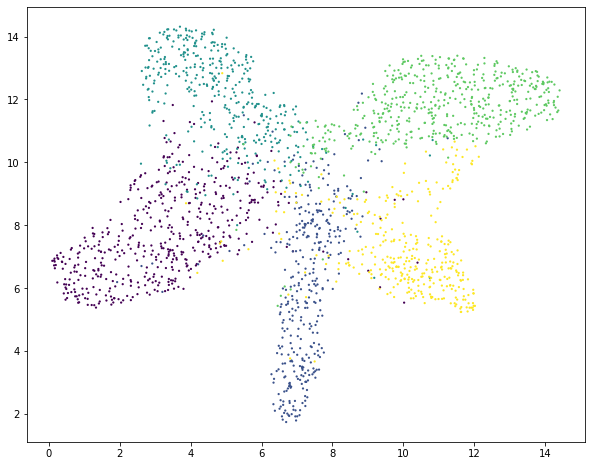

In [80]:
import umap
X_topics = svd_model.fit_transform(matrix)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = df.target,s = 5,edgecolor='none')
plt.show()